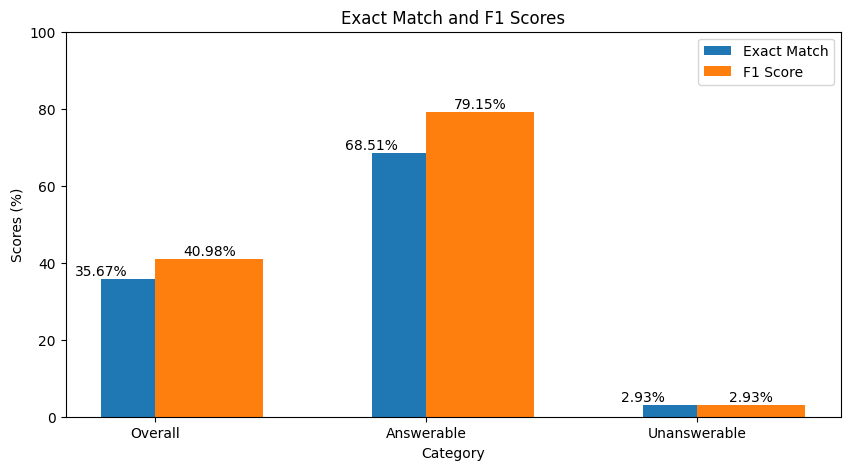

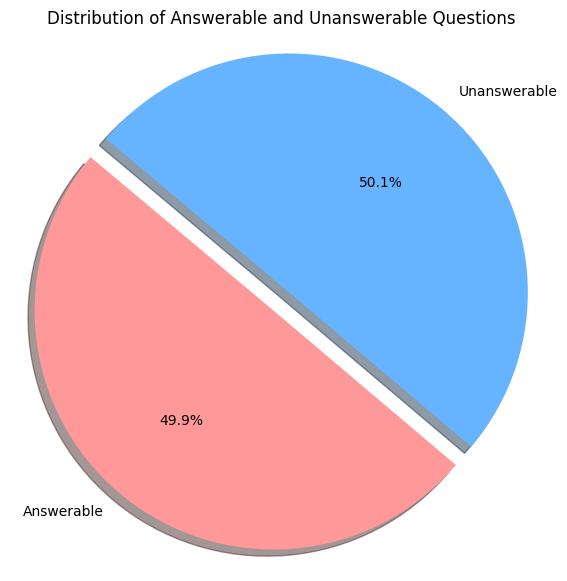

In [4]:
import matplotlib.pyplot as plt
import json

# Sample results
results = {
    "exact": 35.66916533310874,
    "f1": 40.9841072384065,
    "total": 11873,
    "HasAns_exact": 68.50539811066128,
    "HasAns_f1": 79.15052382618089,
    "HasAns_total": 5928,
    "NoAns_exact": 2.926829268292683,
    "NoAns_f1": 2.926829268292683,
    "NoAns_total": 5945
}

# Bar chart for Exact Match and F1 Scores
labels = ['Overall', 'Answerable', 'Unanswerable']
exact_scores = [results['exact'], results['HasAns_exact'], results['NoAns_exact']]
f1_scores = [results['f1'], results['HasAns_f1'], results['NoAns_f1']]

x = range(len(labels))

plt.figure(figsize=(10, 5))
plt.bar(x, exact_scores, width=0.4, label='Exact Match', align='center')
plt.bar(x, f1_scores, width=0.4, label='F1 Score', align='edge')

plt.xlabel('Category')
plt.ylabel('Scores (%)')
plt.title('Exact Match and F1 Scores')
plt.xticks(x, labels)
plt.legend()
plt.ylim(0, 100)

# Show values on bars
for i in range(len(labels)):
    plt.text(i - 0.2, exact_scores[i] + 1, f'{exact_scores[i]:.2f}%', ha='center')
    plt.text(i + 0.2, f1_scores[i] + 1, f'{f1_scores[i]:.2f}%', ha='center')

plt.show()

# Pie chart for Total Questions
labels = ['Answerable', 'Unanswerable']
sizes = [results['HasAns_total'], results['NoAns_total']]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

plt.title('Distribution of Answerable and Unanswerable Questions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


/var/folders/dc/gm62hfbx64d0f98rqwpt3s_h0000gn/T/ipykernel_88689/3032164246.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y="exact", data=df, palette="viridis")


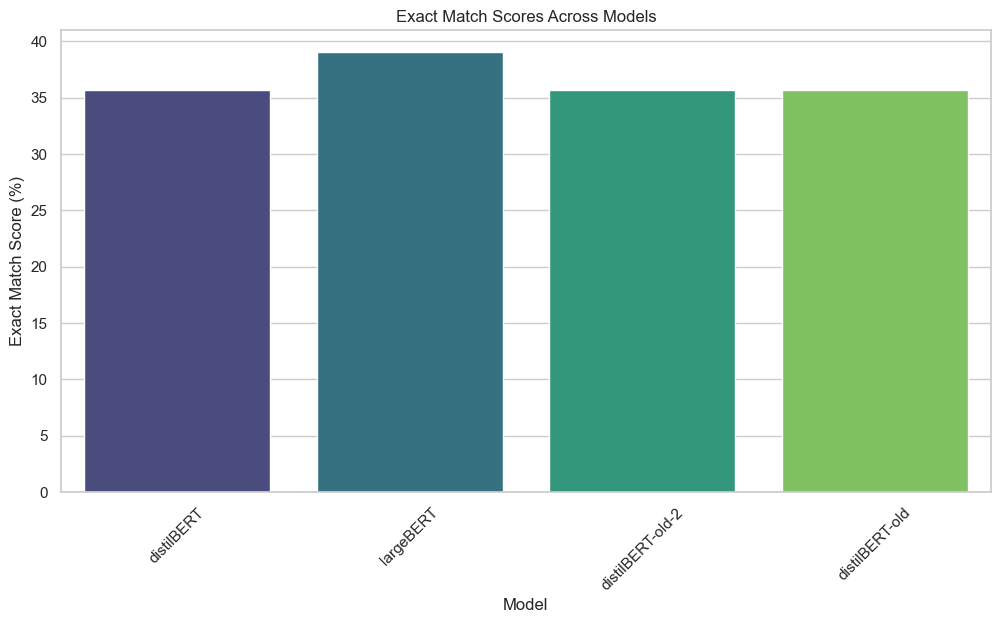

/var/folders/dc/gm62hfbx64d0f98rqwpt3s_h0000gn/T/ipykernel_88689/3032164246.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y="f1", data=df, palette="viridis")


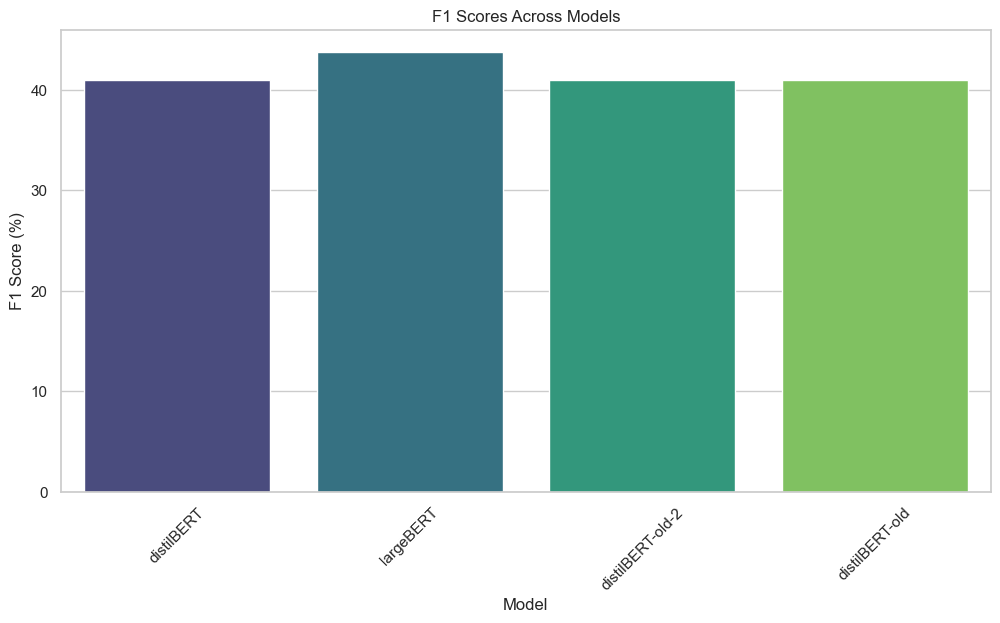

/var/folders/dc/gm62hfbx64d0f98rqwpt3s_h0000gn/T/ipykernel_88689/3032164246.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df["exact"][i], df["f1"][i], df.index[i], fontsize=9, ha='right')


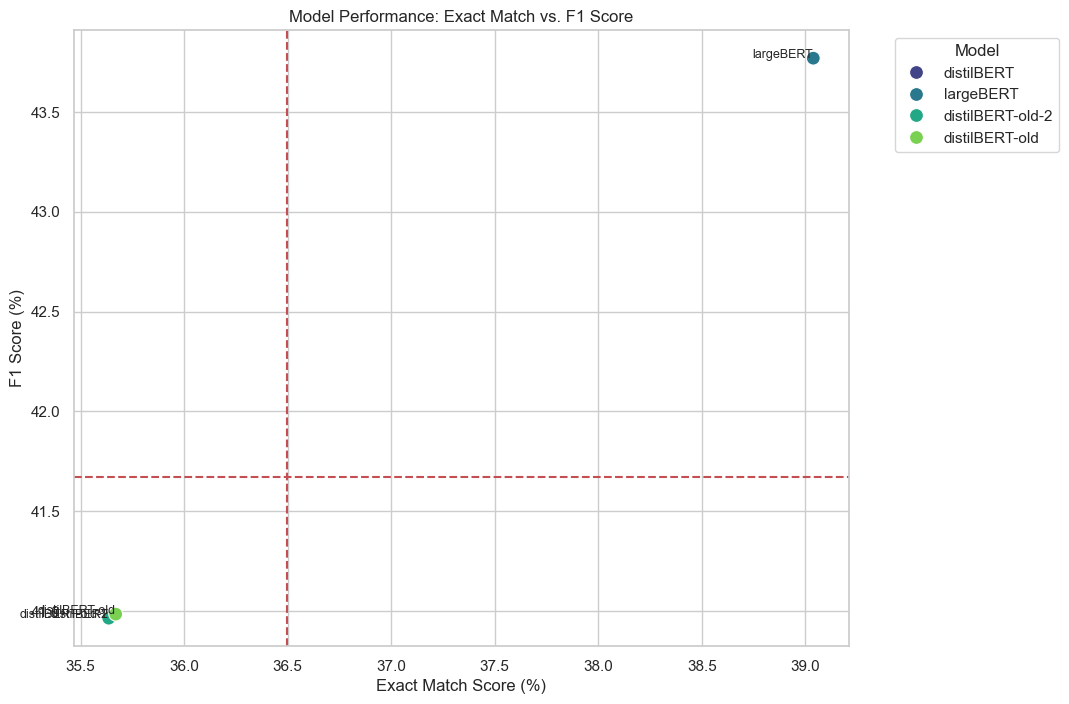

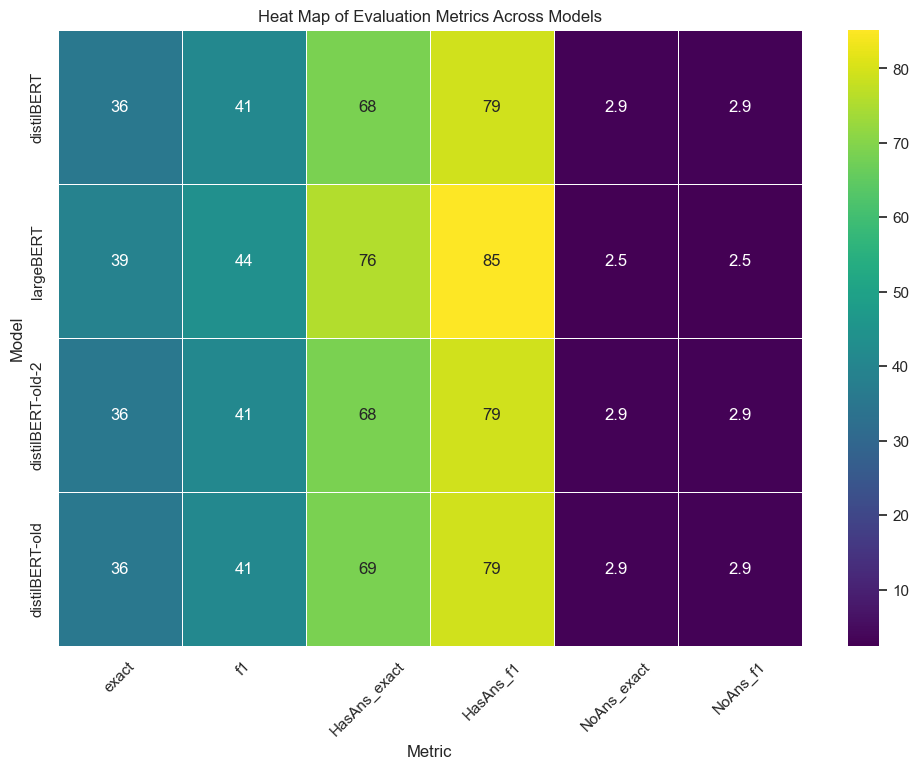

In [13]:
subprocess.check_call([sys.executable, '-m', 'pip', 'install', '--upgrade', 'pip'])
subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'pandas', 'matplotlib', 'seaborn'])

import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
eval_results_dir = "./eval_results"
data = []

for filename in os.listdir(eval_results_dir):
    if filename.endswith("_eval.json"):
        model_name = filename.split("_")[0]
        with open(os.path.join(eval_results_dir, filename), "r") as f:
            results = json.load(f)
            results["model"] = model_name
            data.append(results)

df = pd.DataFrame(data)
df.set_index("model", inplace=True)

# Visualization 1: Comparison of Models Across Each Metric Independently
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=df.index, y="exact", data=df, palette="viridis")
plt.title("Exact Match Scores Across Models")
plt.xlabel("Model")
plt.ylabel("Exact Match Score (%)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=df.index, y="f1", data=df, palette="viridis")
plt.title("F1 Scores Across Models")
plt.xlabel("Model")
plt.ylabel("F1 Score (%)")
plt.xticks(rotation=45)
plt.show()

# Visualization 2: Gardner Quadrants Style
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="exact", y="f1", hue=df.index, palette="viridis", s=100)
plt.title("Model Performance: Exact Match vs. F1 Score")
plt.xlabel("Exact Match Score (%)")
plt.ylabel("F1 Score (%)")
for i in range(df.shape[0]):
    plt.text(df["exact"][i], df["f1"][i], df.index[i], fontsize=9, ha='right')
plt.axhline(y=df["f1"].mean(), color='r', linestyle='--')
plt.axvline(x=df["exact"].mean(), color='r', linestyle='--')
plt.grid(True)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Visualization 3: Heat Map of Evaluation Metrics
metrics = ["exact", "f1", "HasAns_exact", "HasAns_f1", "NoAns_exact", "NoAns_f1"]

plt.figure(figsize=(12, 8))
sns.heatmap(df[metrics], annot=True, cmap="viridis", cbar=True, linewidths=.5)
plt.title("Heat Map of Evaluation Metrics Across Models")
plt.xlabel("Metric")
plt.ylabel("Model")
plt.xticks(rotation=45)
plt.show()


## ==================================================================================================================================

## Model Results

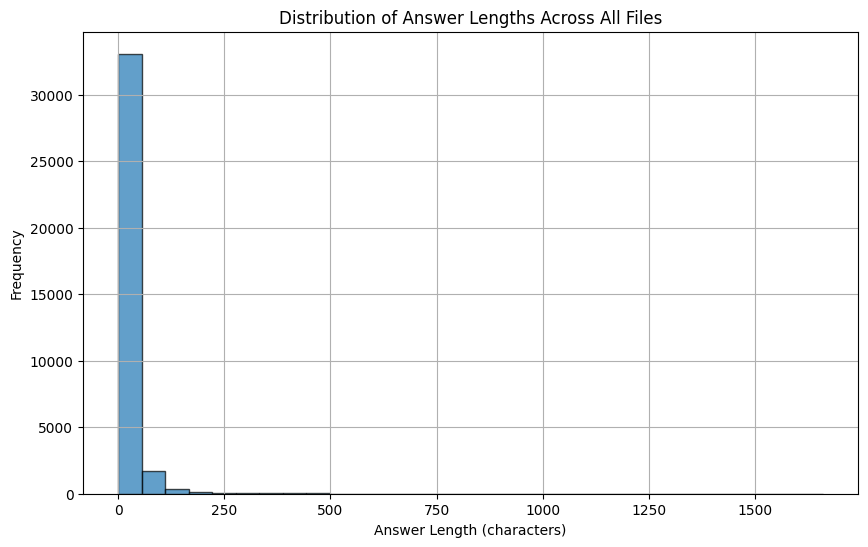

In [22]:
# NOTE: 
# I've been checking the distribution of answer lenghts for 
# fine-tuned models to make a feasible yet sufficiently high assumption
# on max_new_tokens (answer length) in base.py
# --> 250 seems sufficient here for the majority of questions
import utils

# Add directory to Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'scripts', 'utils')))

utils.plot_answer_length_distribution('model_results/tuned')

In [44]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Define dataset
dataset = "SQuAD"

# Manual dictionary for model names
manual_model_name_map = {
    # base SQuAD
    'Llama3-ChatQA-1.5-8B': 'llama3-8b\n(8B)', 
    'falcon-7b-instruct': 'falcon-7b\n(7B)',
    
    # tuned: SQuAD
    'bert-large-cased-whole-word-masking-finetuned-squad': 'largeBERT\n(336M)',
    'distilbert-base-cased-distilled-squad': 'distilBERT\n(65M)',
    'mdeberta-v3-base-squad2': 'mdeBERTa\n(278M)',
    'roberta-base-squad2': 'roBERTa_base\n(124M)',
    'roberta-large-squad2': 'roBERTa_large\n(354M)',
    'xlm-roberta-base-squad2': 'xlm_roBERTa_base\n(277M)', 
    
    # Gtuned: SQuAD
    'bert-multi-english-german-squad2': 'multilang_BERT\n(177M)', 
    'gelectra-base-germanquad-distilled': 'GElectra_distil\n(109M)', 
    'gelectra-base-germanquad': 'GElectra_base\n(109M)', 
    'gelectra-large-germanquad': 'GElectra_large\n(335M)', 
}

# Function to load timing results
def load_timing_results(timing_results_path):
    with open(timing_results_path, 'r') as f:
        timing_results = json.load(f)
    return timing_results

# Function to load json files and extract relevant information
def load_json_files(base_dir, subdirs, dataset):
    results = []
    model_name_map = {}
    for subdir in subdirs:
        subdir_path = os.path.join(base_dir, subdir)
        for file_name in os.listdir(subdir_path):
            if file_name.endswith('_eval_results.json'):
                with open(os.path.join(subdir_path, file_name), 'r') as f:
                    data = json.load(f)
                    
                    # Model Name
                    model_name = file_name.replace('_eval_results.json', '')
                    short_name = manual_model_name_map.get(model_name, model_name.split('-')[0])
                    model_name_map[short_name] = model_name
                    
                    # Evaluation script for SQuAD v2 / GermanQuAD
                    eval_v2 = data.get(dataset, {}).get('evaluate-v2', {})
                    exact = eval_v2.get('exact', 0) / 100  # Rescale to 0-1
                    f1 = eval_v2.get('f1', 0) / 100  # Rescale to 0-1
                    
                    # HasAns metrics
                    has_ans_exact = eval_v2.get('HasAns_exact', 0) / 100
                    has_ans_f1 = eval_v2.get('HasAns_f1', 0) / 100
                    
                    # NoAns metrics
                    no_ans_exact = eval_v2.get('NoAns_exact', 0)
                    no_ans_f1 = eval_v2.get('NoAns_f1', 0)
                    
                    # BLEU 
                    bleu_score = data.get(dataset, {}).get('bleu', {}).get('HasAns_bleu', 0)
                    
                    # ROUGE
                    rouge_scores = data.get(dataset, {}).get('rouge', {}).get('HasAns_rouge', {})
                    rouge1 = rouge_scores.get('rouge1', {}).get('f', 0)
                    rouge2 = rouge_scores.get('rouge2', {}).get('f', 0)
                    rougeL = rouge_scores.get('rougeL', {}).get('f', 0)
                    rouge_score = np.mean([rouge1, rouge2, rougeL])
                    
                    # BERT
                    bert_score = data.get(dataset, {}).get('bertscore', {}).get('HasAns_BERTScore', {}).get('F1', 0)
                    
                    # Cumulative scores 
                    eval_v2_score = 1/2 * (exact + f1)
                    eval_v2_score_hasAns =  1/2 * (has_ans_exact + has_ans_f1)
                    eval_other = 1/3 * (bert_score + bleu_score + rouge_score)
                    overall_score = 1/2 * (eval_v2_score_hasAns + eval_other)
                    
                    results.append({
                        'short_name': short_name,
                        'model': model_name,
                        'exact': exact,
                        'f1': f1,
                        'has_ans_exact': has_ans_exact,
                        'has_ans_f1': has_ans_f1,
                        'no_ans_exact': no_ans_exact,
                        'no_ans_f1': no_ans_f1,
                        'bleu_score': bleu_score,
                        'rouge_score': rouge_score,
                        'bert_score': bert_score,
                        'eval_v2_score': eval_v2_score,
                        'eval_v2_score_hasAns': eval_v2_score_hasAns, 
                        'eval_other': eval_other,
                        'overall_score': overall_score
                    })
    return results, model_name_map

,short_name,model,exact,f1,has_ans_exact,has_ans_f1,no_ans_exact,no_ans_f1,bleu_score,rouge_score,bert_score,eval_v2_score,eval_v2_score_hasAns,eval_other,overall_score,SQuAD,G
1,falcon-7b\n(7B),falcon-7b-instruct,0.055504,0.113179,0.095648,0.211163,1.547519,1.547519,0.000000,0.000000,0.000000,0.084342,0.153406,0.000000,0.042171,NaN,NaN
0,llama3-8b\n(8B),Llama3-ChatQA-1.5-8B,0.147225,0.266115,0.281883,0.520003,1.295206,1.295206,0.000000,0.000000,0.000000,0.206670,0.400943,0.000000,0.103335,NaN,NaN
9,GElectra_base\n(109M),gelectra-base-germanquad,0.207530,0.296117,0.339744,0.517172,7.569386,7.569386,0.000000,0.000000,0.000000,0.251823,0.428458,0.000000,0.125912,1909.539432,665.030208
11,GElectra_large\n(335M),gelectra-large-germanquad,0.279963,0.379442,0.502193,0.701437,5.836838,5.836838,0.000000,0.000000,0.000000,0.329703,0.601815,0.000000,0.164851,5888.141892,1986.069657
2,bert,bert-finetuned-squad,0.369325,0.419758,0.710020,0.811030,2.960471,2.960471,0.000000,0.000000,0.000000,0.394542,0.760525,0.000000,0.197271,NaN,NaN
10,GElectra_distil\n(109M),gelectra-base-germanquad-distilled,0.205677,0.295748,0.338900,0.519302,7.283431,7.283431,0.417757,0.443451,0.845559,0.250713,0.429101,0.568922,0.409817,1889.306097,660.343249
4,distilBERT\n(65M),distilbert-base-cased-distilled-squad,0.362335,0.410843,0.703779,0.800935,2.186712,2.186712,0.675465,0.677588,0.932448,0.386589,0.752357,0.761834,0.574211,1111.990184,669.699848
5,xlm_roBERTa_base\n(277M),xlm-roberta-base-squad2,0.393245,0.434806,0.787618,0.870859,0.000000,0.000000,0.626358,0.687228,0.942047,0.414026,0.829238,0.751878,0.582952,1065.315740,754.472385
6,mdeBERTa\n(278M),mdeberta-v3-base-squad2,0.411690,0.451204,0.824561,0.903703,0.000000,0.000000,0.652710,0.716225,0.947135,0.431447,0.864132,0.772023,0.601735,2181.016819,1941.770526
12,multilang_BERT\n(177M),bert-multi-english-german-squad2,0.381033,0.420085,0.757422,0.835640,0.571909,0.571909,0.743808,0.734815,0.946618,0.400559,0.796531,0.808414,0.604486,2087.638945,635.803910


,Short Name,Full Name
0,llama3-8b\n(8B),Llama3-ChatQA-1.5-8B
1,falcon-7b\n(7B),falcon-7b-instruct
2,bert,bert-finetuned-squad
3,roBERTa_base\n(124M),roberta-base-squad2
4,distilBERT\n(65M),distilbert-base-cased-distilled-squad
5,xlm_roBERTa_base\n(277M),xlm-roberta-base-squad2
6,mdeBERTa\n(278M),mdeberta-v3-base-squad2
7,largeBERT\n(336M),bert-large-cased-whole-word-masking-finetuned-...
8,roBERTa_large\n(354M),roberta-large-squad2
9,GElectra_base\n(109M),gelectra-base-germanquad


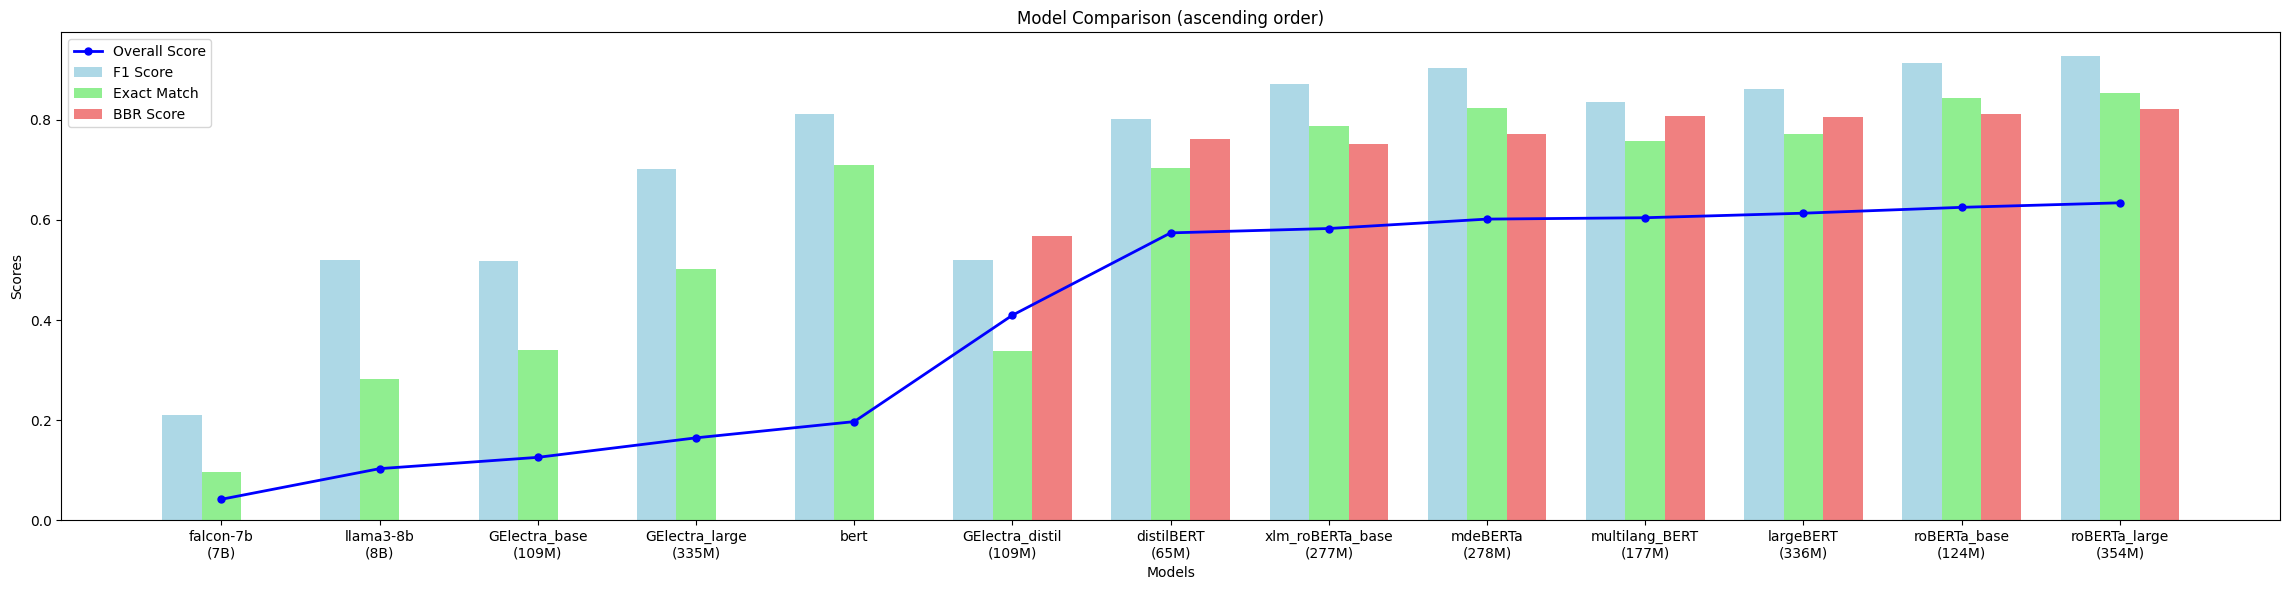

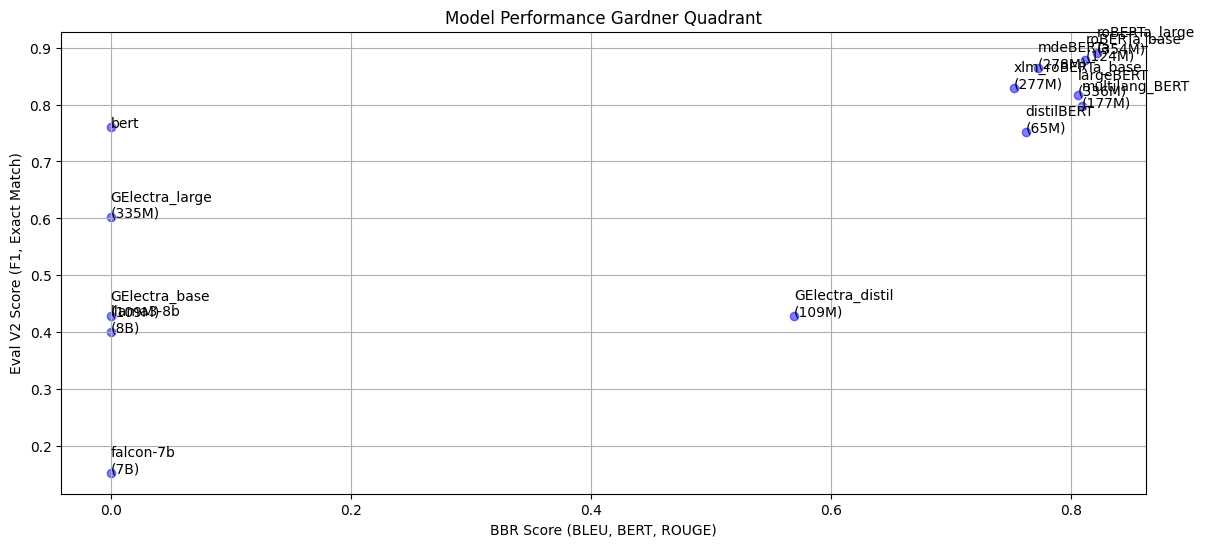

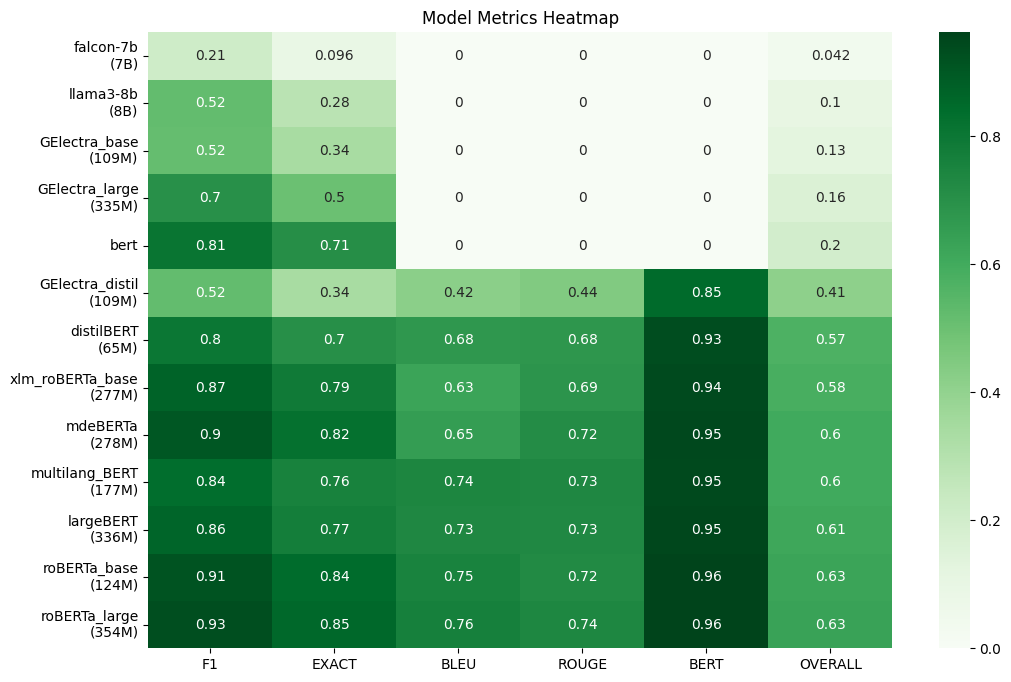

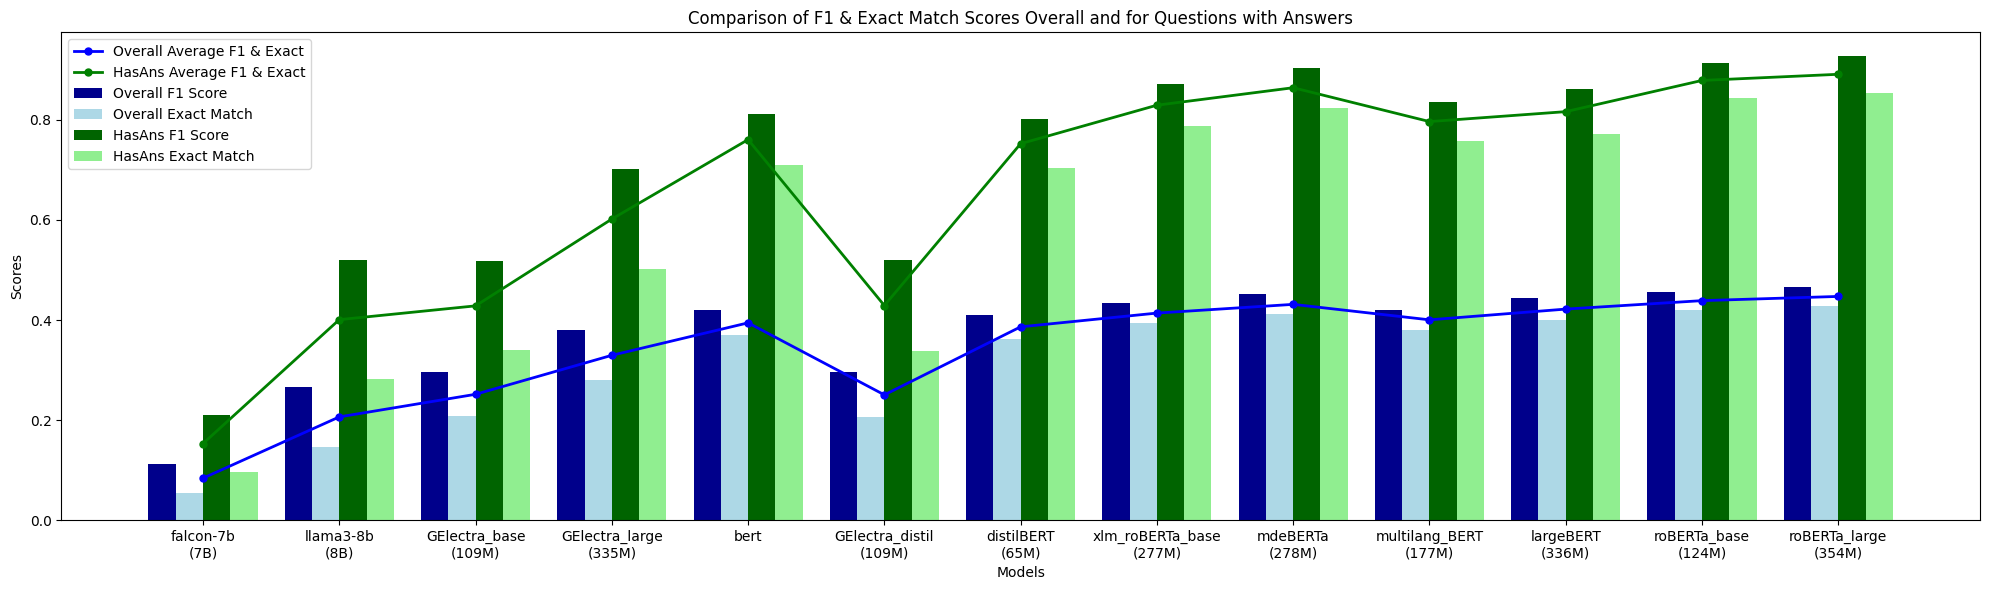

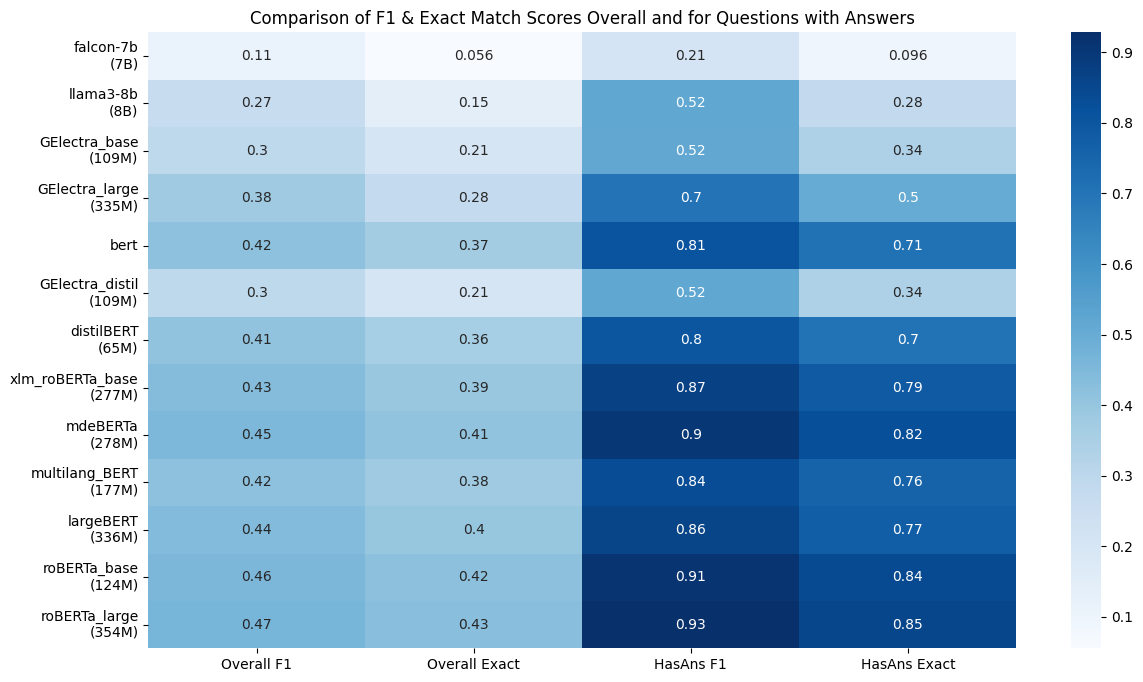

/var/folders/dc/gm62hfbx64d0f98rqwpt3s_h0000gn/T/ipykernel_29725/3564902229.py:168: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotations = timing_data.applymap(lambda x: f"{x:,}s" if isinstance(x, int) else f"{int(x):,}s")


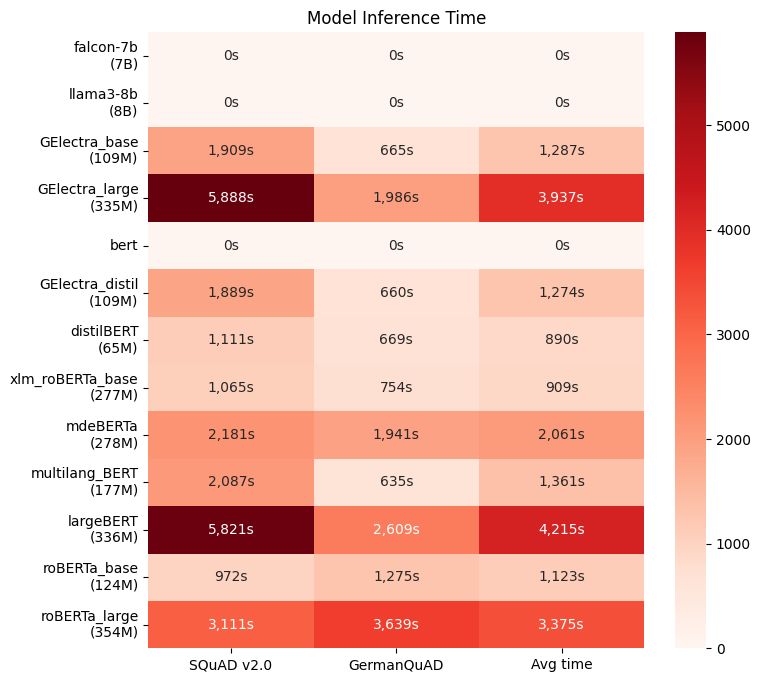

In [50]:
# Define the directory paths
base_dir = './eval_results'
figure_root = './figures'
timing_results_path = './timing_results.json'

# Select the subdirectory
subdir = ['base', 'tuned', 'Gtuned'] # options: base, Gbase, tuned, Gtuned

# Load data
dataset = "SQuAD"
data, model_name_map = load_json_files(base_dir, subdir, dataset)

# Load timing results
timing_results = load_timing_results(timing_results_path)

# Create and display DataFrame
df = pd.DataFrame(data)
timing_df = pd.DataFrame.from_dict(timing_results, orient='index').reset_index()
timing_df = timing_df.rename(columns={'index': 'model'})
df = pd.merge(df, timing_df, on='model', how='left')

df_sorted = df.sort_values(by='overall_score')
display(df_sorted)
display(pd.DataFrame(list(model_name_map.items()), columns=['Short Name', 'Full Name']))

# ============================================================================================
# Visualisation 1: Bar chart with line graph for overall_score
plt.figure(figsize=(23, 6))
bar_width = 0.25
index = np.arange(len(df_sorted))

# Bar chart for F1 Score, Exact Match, and Eval Other with subtle colors
plt.bar(index, df_sorted['has_ans_f1'], bar_width, label='F1 Score', color='lightblue')
plt.bar(index + bar_width, df_sorted['has_ans_exact'], bar_width, label='Exact Match', color='lightgreen')
plt.bar(index + 2 * bar_width, df_sorted['eval_other'], bar_width, label='BBR Score', color='lightcoral')

# Line graph for Overall Score with a subtle color
plt.plot(index + bar_width, df_sorted['overall_score'], color='blue', marker='o', linestyle='-', linewidth=2, markersize=5, label='Overall Score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison (ascending order)')
plt.xticks(index + bar_width, [manual_model_name_map.get(name, name) for name in df_sorted['short_name']], rotation=0)
plt.legend()

plt.tight_layout()

# SAVE ⬇️
save_path = os.path.join(figure_root, 'overall-bar-chart.png')
plt.savefig(save_path)

plt.show()

# ============================================================================================
# Visualisation 2: Gardner Quadrants Style graph
plt.figure(figsize=(14, 6))
plt.scatter(df_sorted['eval_other'], df_sorted['eval_v2_score_hasAns'], c='b', alpha=0.5)
for i, txt in enumerate(df_sorted['short_name']):
    plt.annotate(manual_model_name_map.get(txt, txt), (df_sorted['eval_other'].iat[i], df_sorted['eval_v2_score_hasAns'].iat[i]))

plt.xlabel('BBR Score (BLEU, BERT, ROUGE)')
plt.ylabel('Eval V2 Score (F1, Exact Match)')
plt.title('Model Performance Gardner Quadrant')

plt.grid(True)

# SAVE ⬇️
save_path = os.path.join(figure_root, 'overall-gardner.png')
plt.savefig(save_path)

plt.show()

# ============================================================================================
# Visualisation 3: Heat map
plt.figure(figsize=(12, 8))

# Select and rename the columns for the heatmap
heat_data = df_sorted[['short_name', 'has_ans_f1', 'has_ans_exact', 'bleu_score', 'rouge_score', 'bert_score', 'overall_score']].set_index('short_name')
heat_data.columns = ['F1' if col == 'has_ans_f1' else 'EXACT' if col == 'has_ans_exact' else col.split('_')[0].upper() for col in heat_data.columns] 
heat_data.index = [manual_model_name_map.get(name, name) for name in heat_data.index]

# Create the heatmap
sns.heatmap(heat_data, annot=True, cmap='Greens')

plt.title('Model Metrics Heatmap')

# SAVE ⬇️
save_path = os.path.join(figure_root, 'overall-heatmap.png')
plt.savefig(save_path)

plt.show()

# ============================================================================================
# Visualisation 4: Bar chart to compare overall exact and f1 with HasAns exact and f1
df_sorted = df.sort_values('overall_score')
plt.figure(figsize=(20, 6))
bar_width = 0.2
index = np.arange(len(df_sorted))

# Bar chart for Overall F1 Score, Overall Exact Match, HasAns F1 Score, and HasAns Exact Match with subtle colors
plt.bar(index, df_sorted['f1'], bar_width, label='Overall F1 Score', color='darkblue')
plt.bar(index + bar_width, df_sorted['exact'], bar_width, label='Overall Exact Match', color='lightblue')
plt.bar(index + 2 * bar_width, df_sorted['has_ans_f1'], bar_width, label='HasAns F1 Score', color='darkgreen')
plt.bar(index + 3 * bar_width, df_sorted['has_ans_exact'], bar_width, label='HasAns Exact Match', color='lightgreen')

# Calculate eval_v2_score and eval_v2_score_hasAns
df_sorted['eval_v2_score'] = 0.5 * (df_sorted['exact'] + df_sorted['f1'])
df_sorted['eval_v2_score_hasAns'] = 0.5 * (df_sorted['has_ans_exact'] + df_sorted['has_ans_f1'])

# Plot lines for eval_v2_score and eval_v2_score_hasAns
plt.plot(index + 1.5 * bar_width, df_sorted['eval_v2_score'], color='blue', marker='o', linestyle='-', linewidth=2, markersize=5, label='Overall Average F1 & Exact')
plt.plot(index + 1.5 * bar_width, df_sorted['eval_v2_score_hasAns'], color='green', marker='o', linestyle='-', linewidth=2, markersize=5, label='HasAns Average F1 & Exact')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of F1 & Exact Match Scores Overall and for Questions with Answers')
plt.xticks(index + 1.5 * bar_width, [manual_model_name_map.get(name, name) for name in df_sorted['short_name']], rotation=0)
plt.legend()

plt.tight_layout()

# SAVE ⬇️
save_path = os.path.join(figure_root, 'evaluate-v2-bar-chart.png')
plt.savefig(save_path)

plt.show()

# ============================================================================================
# Visualisation 5: Heat map to compare overall exact and f1 with HasAns exact and f1
plt.figure(figsize=(14, 8))

# Select and rename the columns for the heatmap
heat_data_comparison = df_sorted[['short_name', 'f1', 'exact', 'has_ans_f1', 'has_ans_exact']].set_index('short_name')
heat_data_comparison.columns = ['Overall F1', 'Overall Exact', 'HasAns F1', 'HasAns Exact']

# Update index labels with manual model name map
heat_data_comparison.index = [manual_model_name_map.get(name, name) for name in heat_data_comparison.index]

# Create the heatmap
sns.heatmap(heat_data_comparison, annot=True, cmap='Blues')

plt.title('Comparison of F1 & Exact Match Scores Overall and for Questions with Answers')

# SAVE ⬇️
save_path = os.path.join(figure_root, 'evaluate-v2-heatmap.png')
plt.savefig(save_path)

plt.show()

# ============================================================================================
# Visualisation 6: Heat map for timing results
plt.figure(figsize=(8, 8))

# Extract timing results and reshape data
timing_data = df_sorted[['short_name', 'SQuAD', 'G']].set_index('short_name')
timing_data.columns = ['SQuAD v2.0', 'GermanQuAD']

# Update index labels with manual model name map
timing_data.index = [manual_model_name_map.get(name, name) for name in timing_data.index]

# Convert times to integers and round down
timing_data = timing_data.fillna(0).astype(int)

# Calculate the average time
timing_data['Avg time'] = timing_data.mean(axis=1)

# Create annotations with formatted times and scores
annotations = timing_data.applymap(lambda x: f"{x:,}s" if isinstance(x, int) else f"{int(x):,}s")

# Create the heatmap
sns.heatmap(timing_data, annot=annotations, fmt='', cmap='Reds')

plt.title('Model Inference Time')

# Rotate the axis descriptions by 90°
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# SAVE ⬇️
save_path = os.path.join(figure_root, 'timing-results-heatmap.png')
plt.savefig(save_path)

plt.show()